In [32]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)

# reproducibility
RANDOM_STATE = 101
np.random.seed(RANDOM_STATE)

In [34]:
iris = load_iris(as_frame=True)
X = iris.data                      # features (150×4)
y = iris.target                    # labels   (150,)
df = iris.frame                    # convenience DataFrame

print(df.head())
print("\nClass distribution:\n", pd.Series(y).value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Class distribution:
 target
0    50
1    50
2    50
Name: count, dtype: int64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

In [37]:
cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, n_jobs=-1)
print(f"5‑fold CV accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

5‑fold CV accuracy: 0.958 ± 0.026


Hold‑out accuracy: 0.933

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



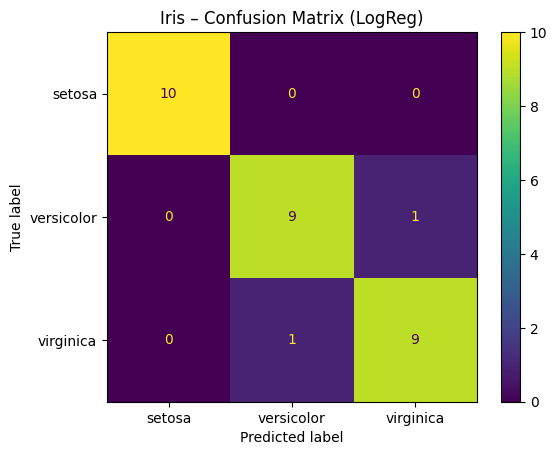

In [38]:
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Hold‑out accuracy: {acc:.3f}\n")

print("Classification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names).plot()
plt.title("Iris – Confusion Matrix (LogReg)")
plt.show()


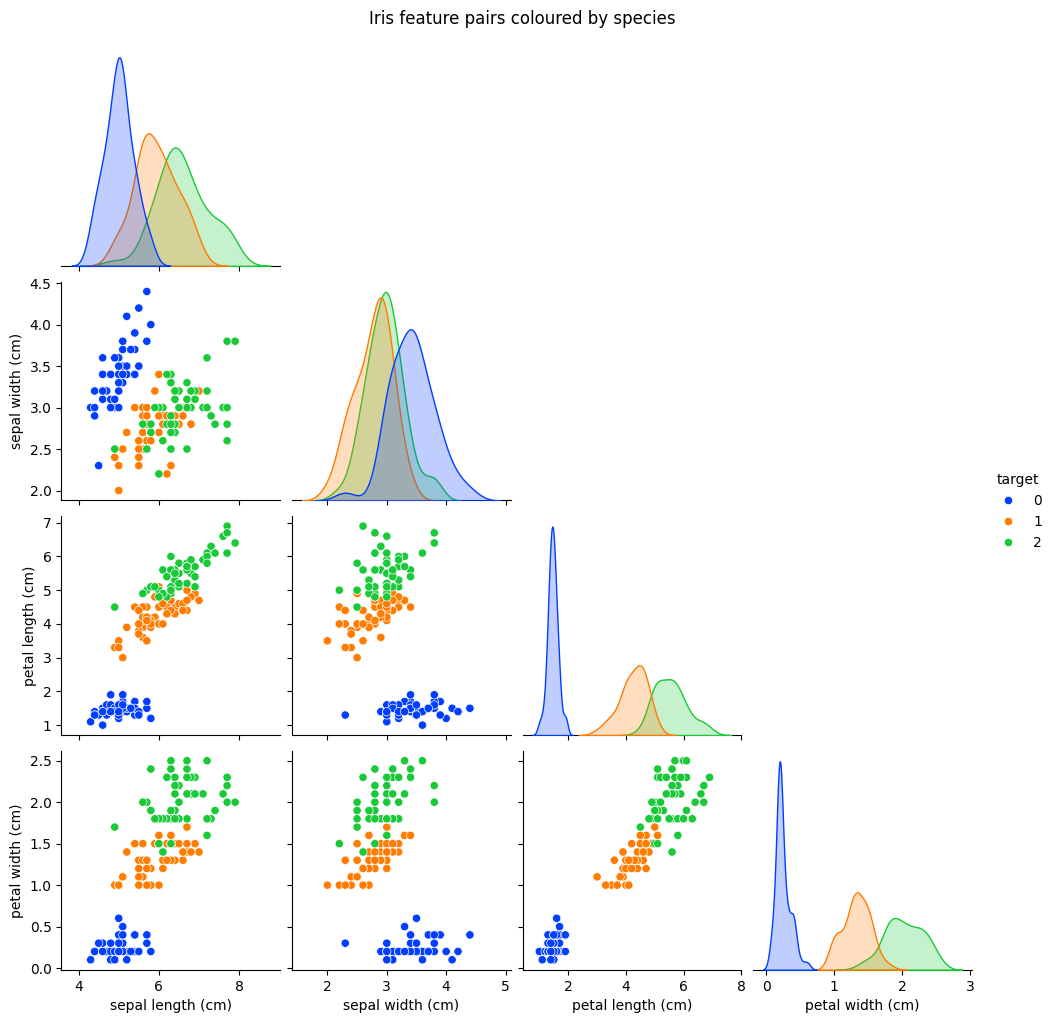

In [39]:
sns.pairplot(df, hue="target", corner=True,
             vars=iris.feature_names,
             palette="bright")
plt.suptitle("Iris feature pairs coloured by species", y=1.02)
plt.show()

In [40]:
import joblib
joblib.dump({
    "model": clf,
    "scaler": scaler,
    "metadata": {
        "dataset": "iris",
        "accuracy": acc,
        "created_by": "Sanskriti",
        "created_on": "2025‑06‑14"
    }
}, "iris_logreg_model.joblib")

print("Model dumped to iris_logreg_model.joblib")

Model dumped to iris_logreg_model.joblib
